In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/kaggle/input/black-friday-sale/train.csv')

In [3]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


looking at prodcuct 1 the mode of the data seems to stand out and could be applied for the missing data in product 2 and 3

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
# Fill null values in 'Product_Category_2' with its mode
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)

# Fill null values in 'Product_Category_3' with its mode
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)

/tmp/ipykernel_1180/251621481.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
/tmp/ipykernel_1180/251621481.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

<Axes: xlabel='Gender', ylabel='count'>

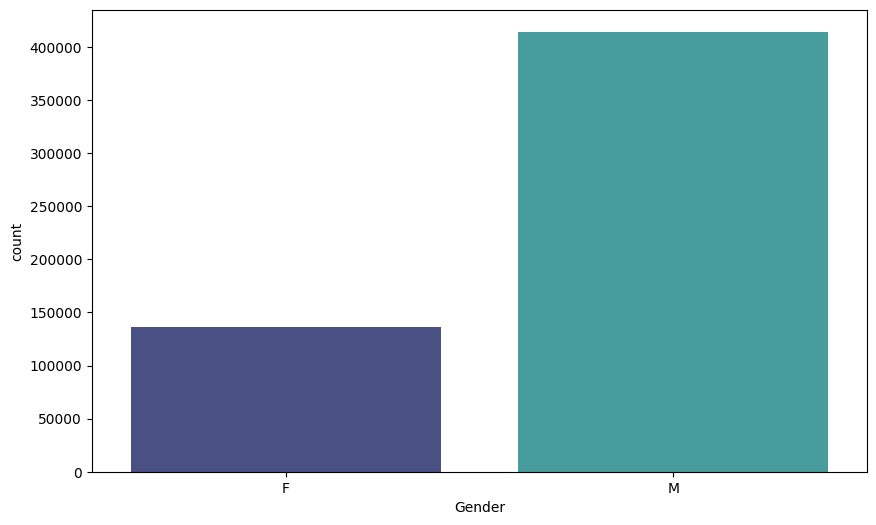

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Gender', palette='mako')

<Axes: xlabel='Gender', ylabel='Purchase'>

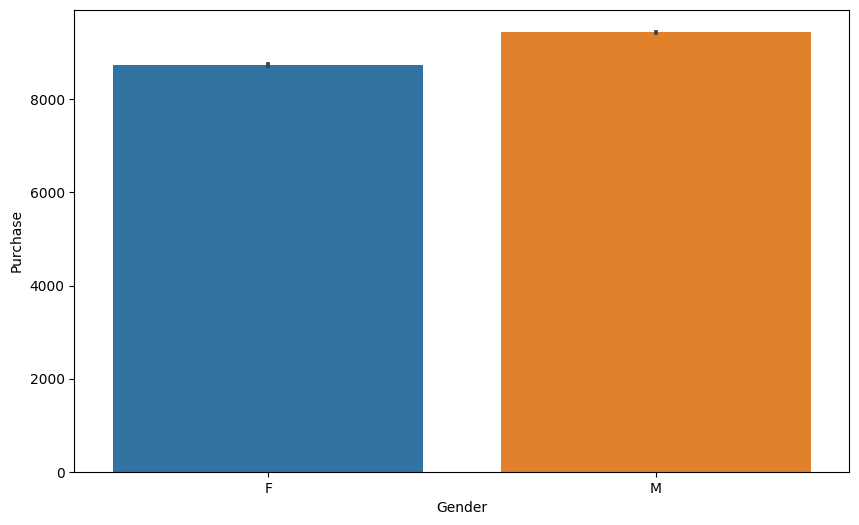

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Purchase', data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

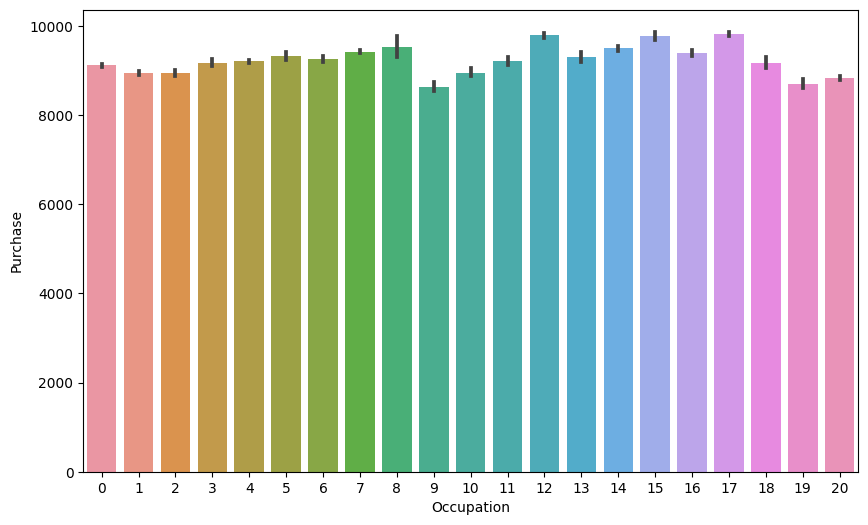

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Purchase', data = df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

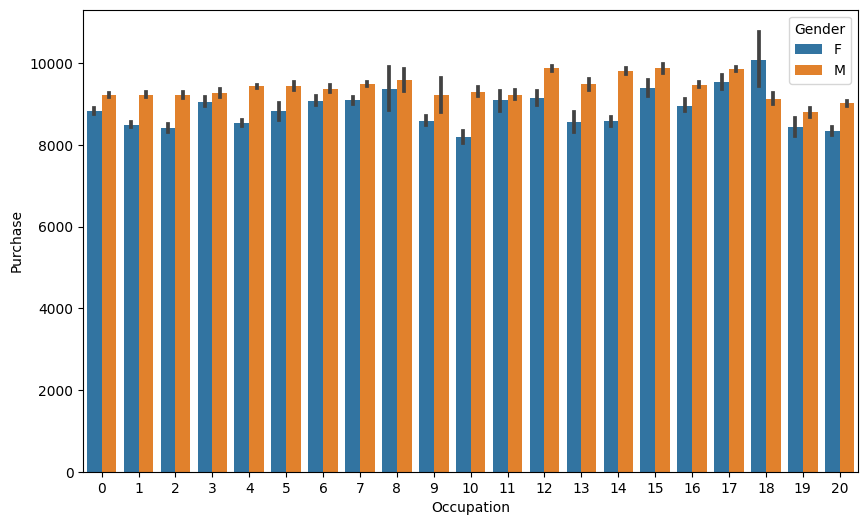

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Age', ylabel='Purchase'>

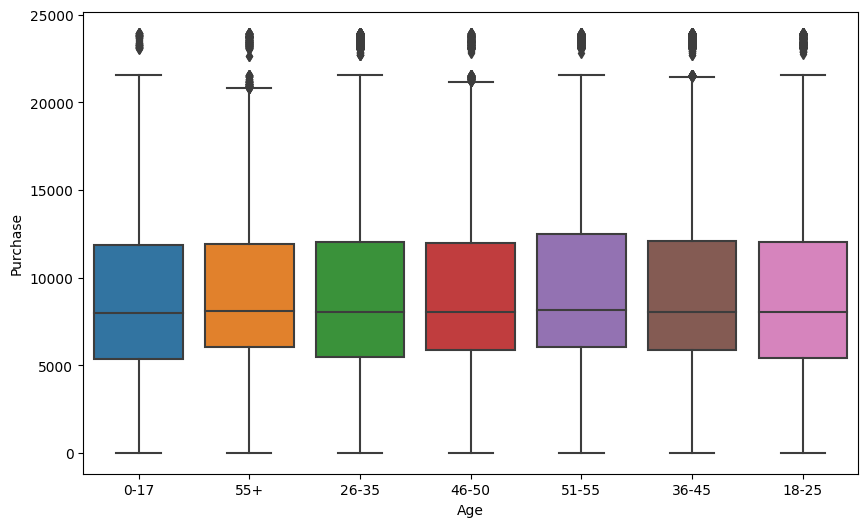

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age', y='Purchase')

<Axes: xlabel='Gender', ylabel='Product_Category_1'>

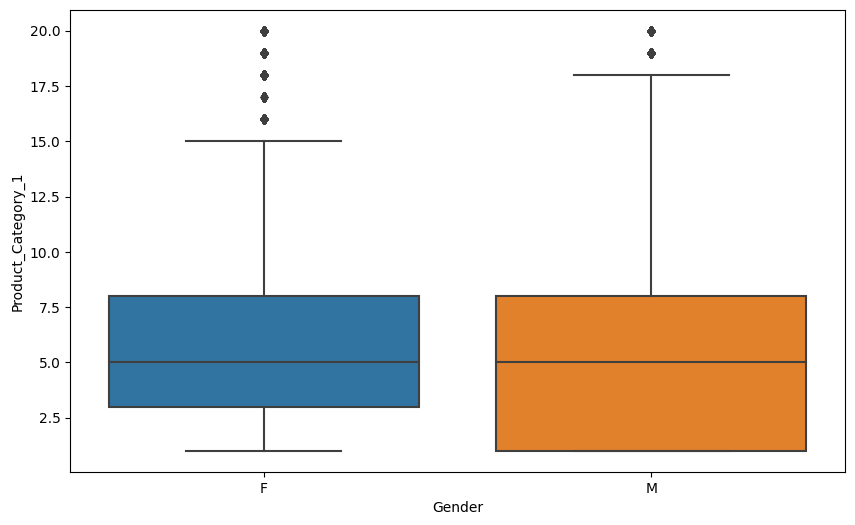

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Gender', y='Product_Category_1')

<Axes: xlabel='Age', ylabel='Product_Category_1'>

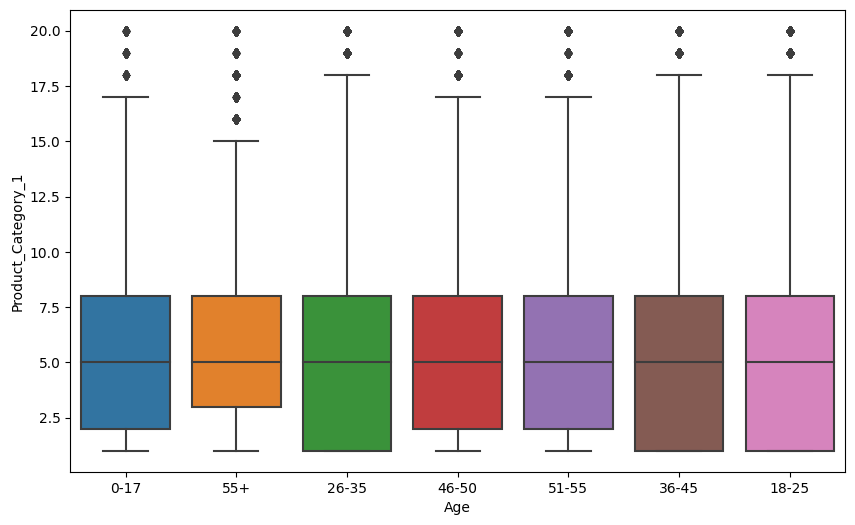

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age', y='Product_Category_1')

Replace categorical variables with numerical

In [14]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [15]:
cat_cols = ['Gender', 'City_Category', 'Age']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [16]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [17]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [18]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [19]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [20]:
df['Product_ID'] = pd.to_numeric(df['Product_ID'], errors='coerce').astype(float)

In [21]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,NaN,0,0,10,0,2,0,3,8.0,16.0,8370
1,1000001,NaN,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,NaN,0,0,10,0,2,0,12,8.0,16.0,1422
3,1000001,NaN,0,0,10,0,2,0,12,14.0,16.0,1057
4,1000002,NaN,1,6,16,2,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,NaN,1,5,13,1,1,1,20,8.0,16.0,368
550064,1006035,NaN,0,2,1,2,3,0,20,8.0,16.0,371
550065,1006036,NaN,0,2,15,1,4,1,20,8.0,16.0,137
550066,1006038,NaN,0,6,1,2,2,0,20,8.0,16.0,365


values of purchase are high and should be scaled for machine learning

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

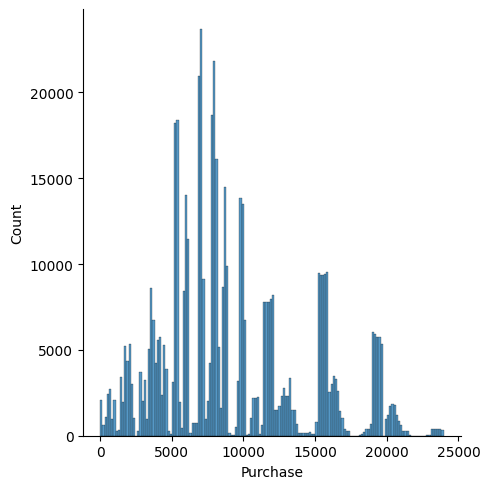

In [22]:
plt.figure(figsize=(10,6))
sns.displot(data=df, x='Purchase')

In [23]:
df['Purchase']=np.log(df['Purchase'])
#now in normal distribution

In [24]:
df=pd.get_dummies(df)
#categorical variables to dummy var
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,NaN,0,0,10,0,2,0,3,8.0,16.0,9.032409
1,1000001,NaN,0,0,10,0,2,0,1,6.0,14.0,9.629051
2,1000001,NaN,0,0,10,0,2,0,12,8.0,16.0,7.259820
3,1000001,NaN,0,0,10,0,2,0,12,14.0,16.0,6.963190
4,1000002,NaN,1,6,16,2,4,0,8,8.0,16.0,8.983314


In [25]:
df.drop('Product_ID', axis=1, inplace=True)
X=df.drop(labels=['Purchase'],axis=1)
y=df['Purchase']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale data

In [27]:
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.fit_transform(X_test)

Machine Learning

In [28]:
df.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_predict=model.predict(X_test)

In [34]:
score=r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rsme=(np.sqrt(mean_squared_error(y_test, y_predict)))
print('rscore: ',score)
print('mean_absolute_error: ', mae)
print('mean_squared_error: ', mse)
print('root_mean_squared_error: ',rsme)

rscore:  0.19034705497429694
mean_absolute_error:  0.4541536746432518
mean_squared_error:  0.44173805269180966
root_mean_squared_error:  0.6646337733607958


In [51]:
DT = DecisionTreeRegressor(max_depth=3)

In [52]:
DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [53]:
train_preds = DT.predict(X_train)
test_preds = DT.predict(X_test)

In [54]:
RSME_train = (np.sqrt(metrics.mean_squared_error(y_train, train_preds)))
RSME_test = (np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

In [55]:
print('RSME TrainingData = ',str(RSME_train))
print('RSME TestData = ',str(RSME_test))
print('_'*50)
print('Rsquared value on train: ',DT.score(X_train, y_train))
print('Rsquared value on test: ',DT.score(X_test, y_test))

RSME TrainingData =  0.5420482447503775
RSME TestData =  0.5420482447503775
__________________________________________________
Rsquared value on train:  0.46447629562148796
Rsquared value on test:  0.4663900763356622


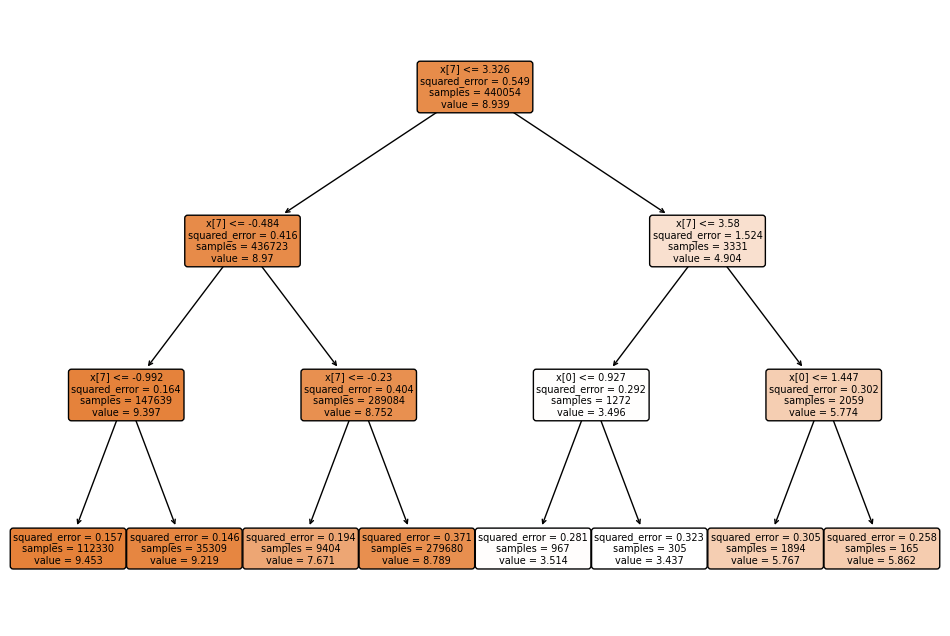

In [56]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
plot_tree(DT, filled=True, rounded=True)
plt.show()

In [58]:
DT = DecisionTreeRegressor(max_depth=12)

In [59]:
DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12)

In [60]:
RSME_train = (np.sqrt(metrics.mean_squared_error(y_train, train_preds)))
RSME_test = (np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

In [61]:
print('RSME TrainingData = ',str(RSME_train))
print('RSME TestData = ',str(RSME_test))
print('_'*50)
print('Rsquared value on train: ',DT.score(X_train, y_train))
print('Rsquared value on test: ',DT.score(X_test, y_test))

RSME TrainingData =  0.5420482447503775
RSME TestData =  0.5420482447503775
__________________________________________________
Rsquared value on train:  0.7522479708809919
Rsquared value on test:  0.7387920148289263
